In [18]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from typing import Callable
from riskchat import _BACKGROUND_DOC, _RERANKER_MODEL_PATH
load_dotenv(override=True)

True

In [4]:
import os
dot_path = "/home/researchlab/anaconda3/envs/hugoenv/bin"
os.environ["PATH"] = f"{dot_path}:{os.environ['PATH']}"

In [5]:
import graphviz
graphviz.set_jupyter_format('svg')
graphviz.set_executable('/home/researchlab/anaconda3/envs/hugoenv/bin/dot')

AttributeError: module 'graphviz' has no attribute 'set_executable'

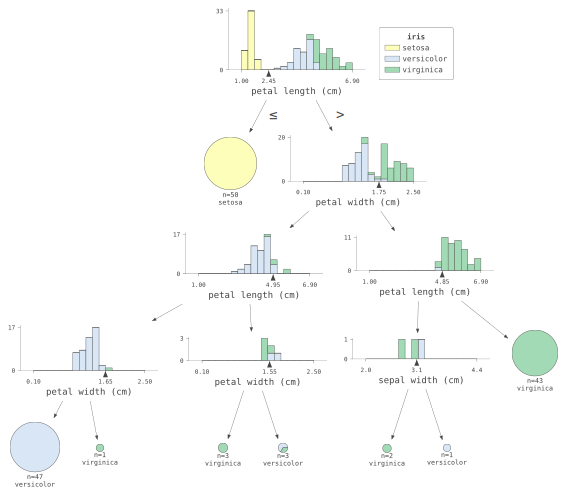

In [15]:
import os
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

# 设置 Graphviz 路径
os.environ["PATH"] += os.pathsep + "/home/researchlab/anaconda3/envs/hugoenv/bin"


iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                          X_train=X, y_train=y,
                          feature_names=iris.feature_names,
                          target_name='iris',
                          class_names=iris.target_names,
                          )

# 使用 save 方法
viz_model.view(fontname = 'monospace')

In [42]:
df = pd.read_csv('docs/DataFrame_Files/risk_cutoff_db_2024_09_25.csv')

/home/researchlab/anaconda3/envs/hugoenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


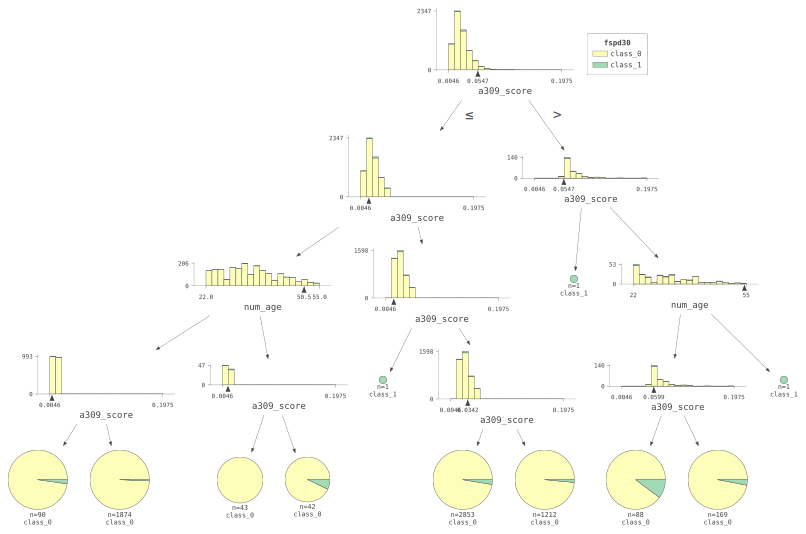

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import dtreeviz

# 假设df是给定的DataFrame
# 先对fspd30去除缺失值
df = df.dropna(subset=['fspd30'])

# 对feature的缺失值进行均值填充
features = ['num_age', 'num_city_tier', 'a309_score']
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

# 分离特征和目标变量
X = df[features]
y = df['fspd30'].astype(int)

# 训练决策树模型
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# 使用dtreeviz画出决策树
viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=features,
                           target_name='fspd30',
                           class_names=['class_0', 'class_1'], # 这里假设是二分类，具体类名根据实际情况修改
                           )

# 将结果保存到名为result的对象中
viz_model.view(fontname='monospace')

In [50]:
type(viz_model.view(fontname='monospace').svg())

str

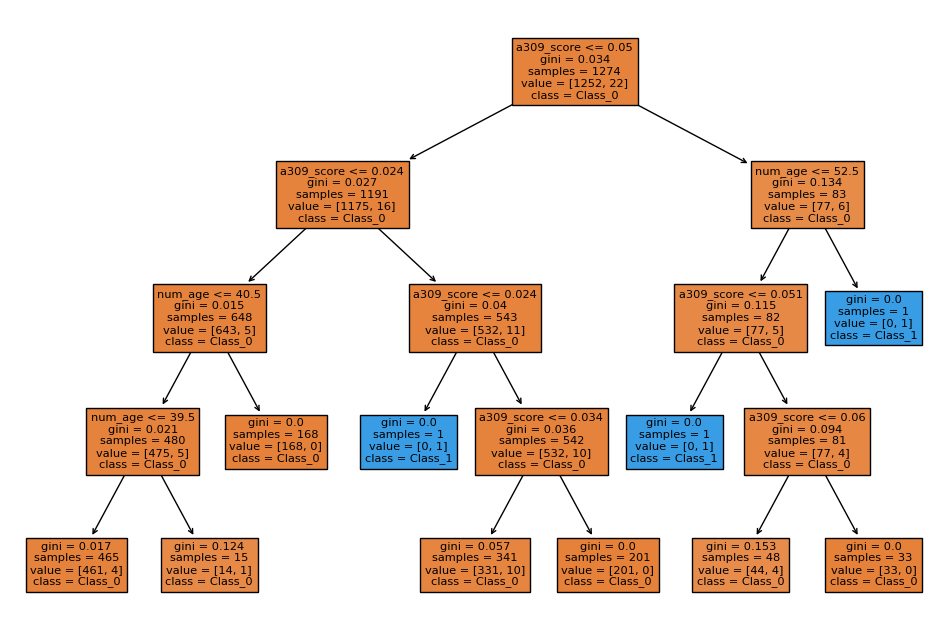

In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Prepare the data
df_target = df['fspd30'].dropna().astype(int)
df_features = df[['num_age', 'num_city_tier', 'a309_score']]
imputer = SimpleImputer(strategy='mean')
df_features = imputer.fit_transform(df_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.8, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, class_names=['Class_0', 'Class_1'], feature_names=['num_age', 'num_city_tier', 'a309_score'])
result = plt.gcf()

In [33]:
type(view)

dtreeviz.utils.DTreeVizRender

In [34]:
isinstance(view, dtreeviz.utils.DTreeVizRender)

True

In [35]:
aa = view.save("iris.svg") 

In [57]:
from typing import Optional, Any
def python_exec(scripts: str, df: Optional[pd.DataFrame] = None) -> Any:
    print('执行如下python代码：\n', scripts)
    if df is None:
        local_vars = {}
    else:
        local_vars = {'df': df}
    try:
        exec(scripts, local_vars)
        # pyfig = local_vars.get('pyfig')
        # pydf = local_vars.get('pydf')
        pyresult = local_vars.get('pyresult')
        return pyresult
    except Exception as e:
        raise PythonAgentError(f'执行代码报错:\n{scripts}\n报错内容: {str(e)}')

scripts = ''' 
import datetime

now = datetime.datetime.now()
one_month_later = now + datetime.timedelta(days=30)
seconds_in_one_month = (one_month_later - now).total_seconds()

pyresult = seconds_in_one_month

'''

        py_result = python_exec(scripts)
        if py_result:
            if '</svg>' in py_result:
                st.image(py_result)
            else:
                st.write(py_result)
        else:
            st.write('无返回结果')


In [58]:
scripts = ''' 
import datetime

now = datetime.datetime.now()
one_month_later = now + datetime.timedelta(days=30)
seconds_in_one_month = (one_month_later - now).total_seconds()

pyresult = seconds_in_one_month

'''

In [59]:
        py_result = python_exec(scripts)
        if py_result:
            if '</svg>' in py_result:
                st.image(py_result)
            else:
                st.write(py_result)
        else:
            st.write('无返回结果')

执行如下python代码：
  
import datetime

now = datetime.datetime.now()
one_month_later = now + datetime.timedelta(days=30)
seconds_in_one_month = (one_month_later - now).total_seconds()

pyresult = seconds_in_one_month




TypeError: argument of type 'float' is not iterable